# Leyendo dataframes

- Creo un nuevo fichero llamado **Open Government Data Analysis**. El fichero de datos **educ_figdp_1_Data.csv** debe estar guardado en la misma carpeta. Ejemplo con dos objetos de datos de dos ficheros distintos. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

- na_values=”:” → si en el fichero hay un símbolo que representa “no available” value.
- usecols → listado de columnas que usaremos. Si no lo uso, coge todas las columnas. 
- Tenemos más funciones de lectura **read_excel()** → leer excel, **read_hdf()** → formato hdf5, **read_table()** → ficheros tabulados (¿tsv?), **read_clipboard()** → del portapapeles
- datos2.head() → 5 primeras filas, y si datos2.head(n) → n filas. Si datos2.tail() → últimas filas. 
- datos2.index, datos2.columns → retorna objetos / listas con los valores de las columnas e índices. Se pueden cambiar. 

In [2]:
datos = pd.read_csv('educ_figdp_1_Data.csv', na_values=':',usecols=['TIME','GEO','Value'])
datos2 = pd.read_csv('educ_uoe_fine09_page_linear.csv',na_values=':',usecols=['DATAFLOW','freq','geo','TIME_PERIOD','OBS_VALUE'])
datos3 = pd.read_csv('educ_uoe_fine09_page_linear.csv',na_values=':')

- **datos2.describe()** → esta función lanza datos estadísticos de las columnas de datos numéricos. 


In [3]:
datos2.describe()

,TIME_PERIOD,OBS_VALUE
count,255.000000,255.000000
mean,2016.070588,6148.242745
std,2.538467,4798.682941
min,2012.000000,105.400000
25%,2014.000000,2643.750000
50%,2016.000000,4351.700000
75%,2018.000000,7681.650000
max,2020.000000,20269.900000


## Filtrando y manipulando datos

- **datos2['DATAFLOW']** → selecciono sólo una columna. 
- **datos2[30:35]** → posiciones de la 30 a la 34 (el último no cuenta)
- **datos2.loc[40:50,['TIME_PERIOD','OBS_VALUE']]** → para obtener un subDataFrame (ix está suprimido; se usa loc).
### Filtrando datos 
- **datos2[datos2['OBS_VALUE']>5000].head()** → sólo se muestra de datos los registros en los que los valores de la columna OBS_VALUE son mayores de 5000. Se crea una máscara True para aquellas filas que cumplan la condición y False para las que no. 
- Se usa **<span style="color:red">isnull()</span>**   para encontrar valores no disponibles. Por ejemplo **datos[datos['Value'].isnull()].head()** → registros cuyos valores en la columna Value no están disponibles (**NaN**).
### Manipulando datos
- Aplicamos las funciones de la tabla siguiente a filas o columnas. Se agregan así datos, dando un resultado. Son funciones de agregación.

<img title="Tabla de funciones" alt="Tabla de funciones" src="tabla2_1.png">

### Las funciones también pueden aplicarse a una dataframe
- **datos2.max(axis=0)** → el máximo de cada columna
- **datos2.max(axis=1)** → el máximo por filas.
- Hay una diferencia entre **datos2.max()** → función de pandas y **max(datos2)** → función de python. En el primer caso se excluyen los datos NaN ; en el segundo no.





#### Operaciones por columnas y filas
- Podemos hacer operaciones por columnas o filas → s = **datos['Value']/1000 y s.head()**


In [4]:
s = datos['Value']/1000
s.head()


0        NaN
1        NaN
2    0.00500
3    0.00503
4    0.00495
Name: Value, dtype: float64

## Usando apply y drop

- Crear una nueva columna:  
    - **datos['Normalizado']=datos['Value']/datos['Value'].max()**
- Para eliminar unas filas o unas columnas usamos el método **drop**. axis=0 para filas y axis=1 para columnas. Se devuelve un dataframe y no se borra ese contenido del original, a menos que se use inplace = True. 
    - **datos.drop('Normalizado',axis=1,inplace=True)**
- Borrado de filas mediante sus índices:
    - **datos.drop(datos.index[3:20],axis=0,inplace=True)**
- Para crear una nueva fila: (append está en desuso y se usa concat)


#### Ejemplo de concat

In [5]:
midato = [[2100,"España",300]] # listas de listas
datos_new = pd.DataFrame(midato,columns=['TIME','GEO','Value']) # creo un dataframe con mi dato y las mismas columnas que datos
datos_new_2 = pd.concat([datos,datos_new], ignore_index=True) # formato de lista. Ojo. 
datos_new_2.tail() ## Observar como se agrega al final de la lista

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2100,España,300.00


#### Ejemplo del uso de apply

Se puede usar apply para aplicar una función a un conjunto de datos.


In [6]:
s = datos['Value'].apply(np.sqrt)
ss = datos['Value'].apply(lambda n: n ** 0.5)
print(ss.head())
print(s.head())

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64
0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64


## Quitando valores NaN y ordenando

- Obtener valores NaN →   **datosNaN=datos[datos['Value'].isnull()]**
- Quedarse con valores sin NaN → **datosNoNaN=datos[datos['Value'].notna()]**

#### Para remover columnas con NaN:

- **datosSINNaN = datos.dropna(how="any",subset=['Value'])**
- **how any**, cualquier fila que contenga un NaN, subset → en la columna de esos valores. 


In [7]:
datosNaN = datos[datos['Value'].isnull()]
datosNoNaN=datos[datos['Value'].notna()]
# print(datosNaN)
# print(datosNoNaN)
datosSINNaN = datos.dropna(how="any",subset=['Value'])
# print(datosSINNaN)

#### Para, en vez de quitarlos, rellenarlos con un valor 
- **datosSINNaN = datos.fillna(value={'Value':0})** → diccionario con key nombre columna y valor.


In [8]:
datosSINNaN = datos.fillna(value={'Value':0}) 
# print(datosSINNaN)

#### Para ordenar los datos
- **datos.sort_values(by='Value',ascending=False,inplace=True)** → por columna, descendente y se sustituye datos por el dataframe ordenado.0
- **datos.sort_index(axis=0, ascending=True, inplace=True)** → volver a ordenarlos por el índice.

In [9]:
datos.sort_values(by='Value',ascending=False,inplace=True)
# print(datos.head(10))
datos.sort_index(axis=0, ascending=True, inplace=True)
# print(datos.head(10))


## Agrupando y reestructurando datos

- Para agrupar datos, según el resultado de una función:
    - **datosAgrupados = datos[['GEO','Value']].groupby('GEO').mean()** → agrupa por las columnas GEO y Value, y por cada valor de GEO obtiene la media de Value.

In [10]:
datosAgrupados = datos[['GEO','Value']].groupby('GEO').mean()
datosAgrupados.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


### Reestructurando datos
- Podemos reestructurar nuestros datos para que parezcan más una hoja de cálculo:
    - **datos_filtrados = datos[datos['TIME']>2006]** → filtro por años
    - **hoja_datos=pd.pivot_table(datos_filtrados, values='Value', index='GEO', columns='TIME')** → valores de Value, índices lo de la columna GEO y columnas los años.
- Se puede hacer una agregación (si hay más de un valor con columna e index) usando una función de agregación aggr_function dentro de pivot_table
- Podemos usar loc para localizar datos →  **hoja_datos.loc[['Spain','Belgium'],[2007,2008]]**


In [11]:
datos_filtrados = datos[datos['TIME']>2006]
hoja_datos=pd.pivot_table(datos_filtrados, values='Value', index='GEO', columns='TIME')
hoja_datos.loc[['Spain','Belgium'],[2007,2008]]

TIME,2007,2008
GEO,,
Spain,4.34,4.62
Belgium,6.00,6.43


## Ranking

A una tabla pivote, a la que quito algunas referencias y modifico otra, y quito las filas NaN, puedo hacer un ranking. Hay varios métodos: en el “first“ es el orden en el que aparecen en el array. Se muestra por años.


In [12]:
## de datos_filtrados... Trabajo con ellos
## Y con la hoja de datos
hoja_datos_limpia=hoja_datos.drop([
'Euro area (13 countries)',
'Euro area (15 countries)',
'Euro area (17 countries)',
'Euro area (18 countries)',
'European Union (25 countries)',
'European Union (27 countries)',
'European Union (28 countries)'
], axis = 0)

hoja_datos_limpia = hoja_datos_limpia . rename ( index = { 'Germany (until 1990 former territory of the FRG)': 'Germany'}) # cambio la referencia de Alemania
hoja_datos_limpia=hoja_datos_limpia.dropna() # Quito filas con Na

hoja_datos_limpia.rank(ascending = False, method="first").head() # Muestro el ranking.


TIME,2007,2008,2009,2010,2011
GEO,,,,,
Austria,7.0,11.0,7.0,8.0,8.0
Belgium,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,3.0
Czech Republic,20.0,21.0,21.0,20.0,19.0


Aplico la suma de columnas a la tabla pivote y aplico rank con el método dense. Ordeno valores. Los empatados tienen el mismo ranking con dense


In [13]:
totalsum = hoja_datos_limpia.sum(axis=1) # sumo por columnas
totalsum.rank(ascending=False,method="dense")


GEO
Austria            8.0
Belgium            4.0
Bulgaria          20.0
Cyprus             2.0
Czech Republic    19.0
Denmark            1.0
Estonia           10.0
Finland            3.0
France             7.0
Germany           16.0
Hungary           15.0
Ireland            6.0
Italy             18.0
Latvia            12.0
Lithuania         13.0
Malta              5.0
Netherlands        7.0
Poland            14.0
Portugal          11.0
Slovakia          21.0
Slovenia           9.0
Spain             17.0
dtype: float64

## <span style="color:darkviolet">Plotting. Datos sumados y ordenados</span>

<AxesSubplot:title={'center':'Gráfica sumando los años'}, xlabel='GEO'>

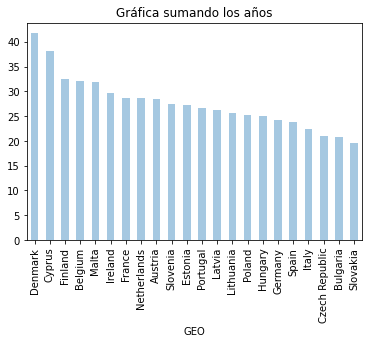

In [14]:
totalsum = hoja_datos_limpia.sum(axis=1).sort_values(ascending=False)
totalsum.plot(kind="bar",style="b",alpha=0.4,title="Gráfica sumando los años")

## <span style="color:darkviolet">Plotting. Con colores</span>

<AxesSubplot:title={'center':'Gráfica 2'}, xlabel='GEO'>

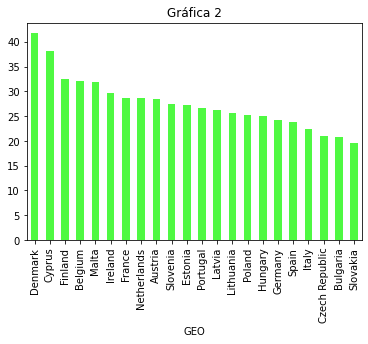

In [15]:
totalsum.plot(kind="bar",color="#23F813",alpha=0.8,title="Gráfica 2")

## <span style="color:darkviolet">Plotting. Más elaborado.</span>

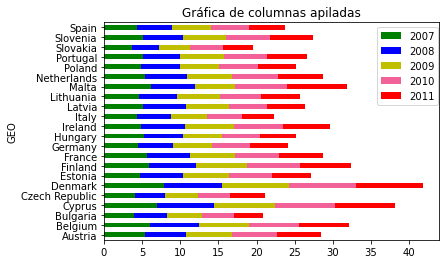

In [16]:
micolores=['g','b','y','#F26198','r','m']
ax = hoja_datos_limpia.plot( kind="barh", stacked=True,color = micolores, title = "Gráfica de columnas apiladas")
ax.legend (loc = 'center left' , bbox_to_anchor=(0.8 , 0.8))
